In [1]:
"""
Var 13
Нехай x(t) - чисельність жертв, y(t) - чисельність хижаків. Коефіцієнт розмноження жертв за відсутності
хижаків дорівнює 9, а коефіцієнт природньої загибелі хижаків 6. При взаємодії двох популяцій, жертви
зменшуються з інтенсивністю 4, при цьому хижаки нарощують свою біомасу з інтенсивністю 9.
Досідити:
    1) Стаціонарні точки.
    2) Побудувати графік динаміки двох популяцій (а) x0 > y0, (б) x0 < y0.
    3) Побудувати 3D графік.
Коефіцієнт внутрішньовидової взаємодії серед жертв дорівнює 3.
Провести аналогічне дослідження (пункти 1)-3)).
""";

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from typing import Tuple
from scipy.integrate import solve_ivp, odeint
import seaborn as sns

sns.set()
%matplotlib inline
params = {'legend.fontsize': 16,
          'legend.handlelength': 2}
plt.rcParams.update(params)

In [3]:
h = 0.01
t = np.arange(0, 3 + h, h)
initials = [(1, 2), (1, 1), (2, 1)]

eps1, gamma1 = 9, 4
eps2, gamma2 = 6, 9

dxdt = lambda x, y: x * ( eps1 - gamma1 * y)
dydt = lambda x, y: y * (-eps2 + gamma2 * x)
grad = lambda z, t=0: (dxdt(*z), dydt(*z))

x_s1 = 0
y_s1 = 0

x_s2 = eps2 / gamma2
y_s2 = eps1 / gamma1

print(f"stationary point {np.round(x_s1, 2), np.round(y_s1, 2)}")
print(f"stationary point {np.round(x_s2, 2), np.round(y_s2, 2)}")

stationary point (0, 0)
stationary point (0.67, 2.25)


In [4]:
def plot_2d(x0: float, y0: float) -> None:
    z = odeint(grad, [x0, y0], t)
    x, y = z.T

    fig, ax = plt.subplots(figsize=(20, 10))
    
    ax.plot(t, x, label=f'$x(t), x(0) = {x0:.2f}$')
    ax.plot(t, y, label=f'$y(t), y(0) = {y0:.2f}$')

    ax.set_xlabel('$t$', fontsize=20)
    ax.set_ylabel('$x, y$', fontsize=16)

    plt.legend();

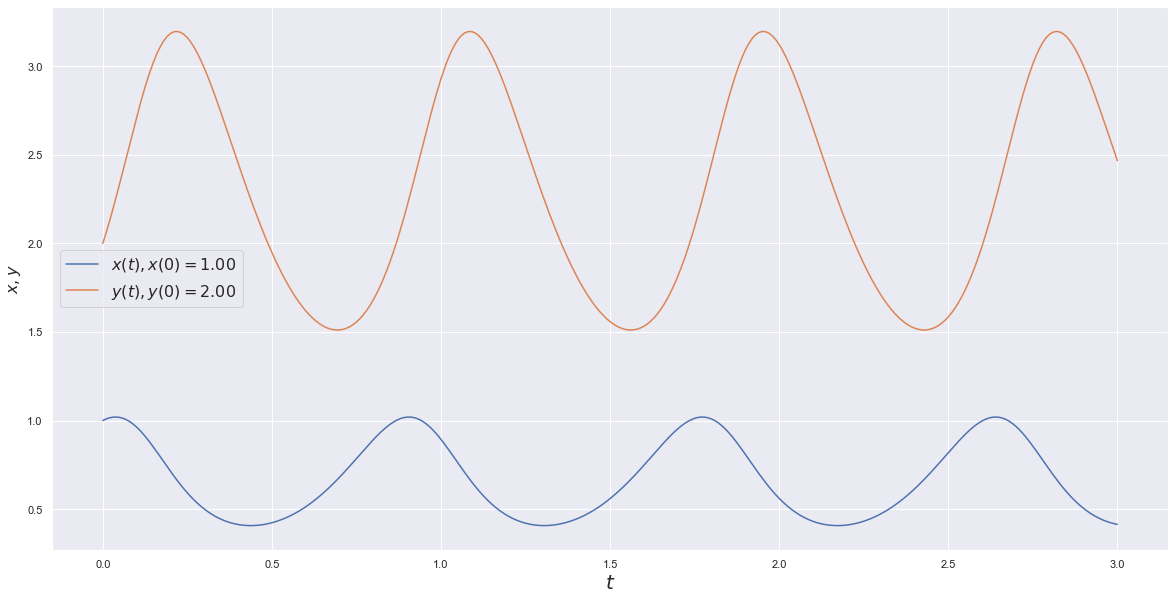

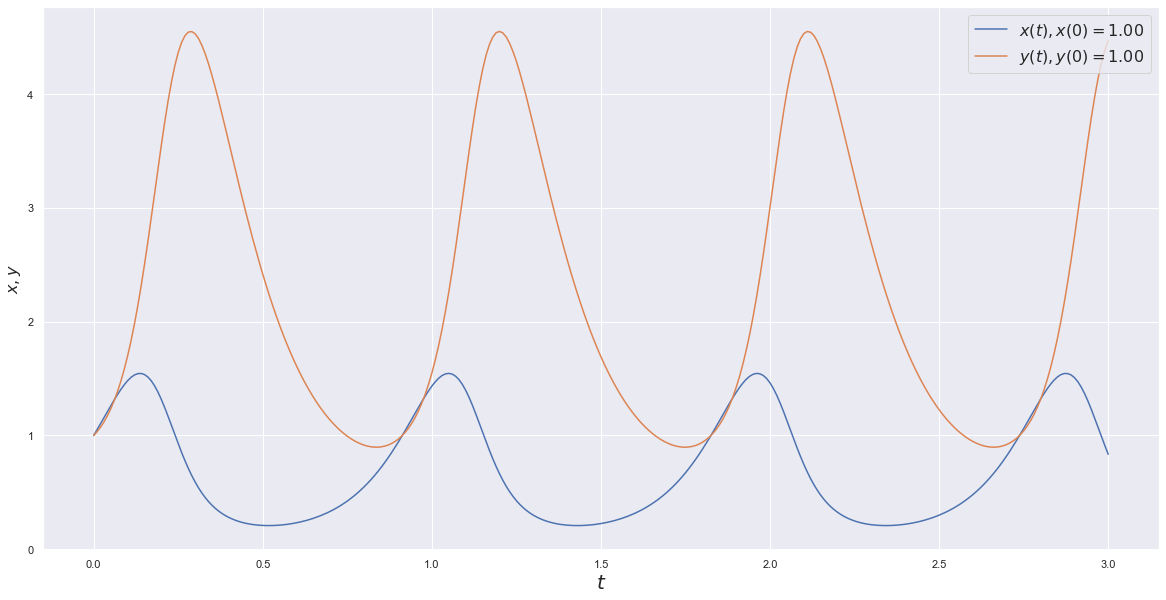

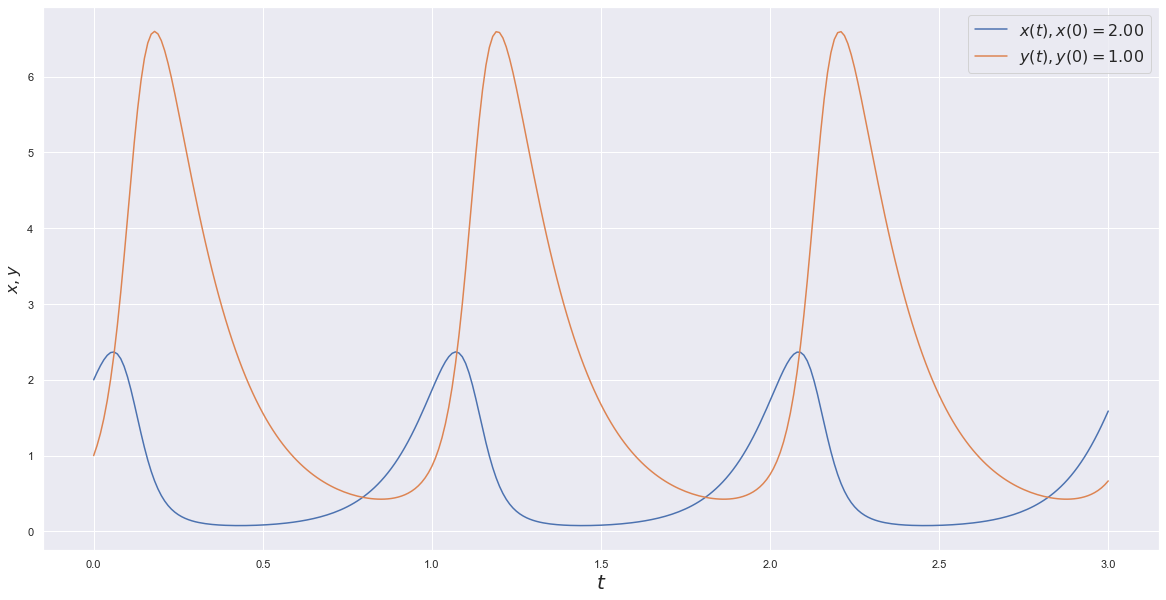

In [5]:
for x, y in initials:
    plot_2d(x, y)

In [6]:
def plot_3d(x0: float, y0: float) -> None:
    z = odeint(grad, [x0, y0], t)
    x, y = z.T
    
    
    fig, [ax1, ax2] = plt.subplots(1, 
                                   2,
                                   figsize=(20, 10), 
                                   subplot_kw=dict(projection='3d'), 
                                   gridspec_kw=dict(wspace=0.01, hspace=0.01))
    
    ax1.plot(x,
             y, 
             t,
             'g-',
             zorder=1,
             label=f'$x(0) = {x0:.2f}, y(0) = {y0:.2f}$')
    ax1.plot(np.repeat(x_s1, t.shape[0]),
             np.repeat(y_s1, t.shape[0]),
             t,
             'k--',
             zorder=0,
             label=f'$x(0) = {x_s1:.2f}, y(0) = {y_s1:.2f}$')
    ax1.plot(np.repeat(x_s2, t.shape[0]),
             np.repeat(y_s2, t.shape[0]),
             t,
             'k--',
             zorder=0,
             label=f'$x(0) = {x_s2:.2f}, y(0) = {y_s2:.2f}$')
    lim = np.max([x.max(), y.max()])
    ax1.set_xlim3d(0, lim)
    ax1.set_ylim3d(lim, 0)
    ax1.set_xlabel('$x(t)$', fontsize=16)
    ax1.set_ylabel('$y(t)$', fontsize=16)
    ax1.set_zlabel('$t$', fontsize=16)
    
    
    ax2.plot(x,
             y, 
             t,
             'g-',
             zorder=1,
             label=f'$x(0) = {x0:.2f}, y(0) = {y0:.2f}$')
    ax2.plot(np.repeat(x_s1, t.shape[0]),
             np.repeat(y_s1, t.shape[0]),
             t,
             'k--',
             zorder=0,
             label=f'$x(0) = {x_s1:.2f}, y(0) = {y_s1:.2f}$')
    ax2.plot(np.repeat(x_s2, t.shape[0]),
             np.repeat(y_s2, t.shape[0]),
             t,
             'k--',
             zorder=0,
             label=f'$x(0) = {x_s2:.2f}, y(0) = {y_s2:.2f}$')
    ax2.set_xlabel('$x(t)$', fontsize=16)
    ax2.set_ylabel('$y(t)$', fontsize=16)
    ax2.set_zlabel('$t$', fontsize=16)
    
    
    plt.suptitle(f'$x(0) = {x0:.2f}, y(0) = {y0:.2f}$', fontsize=20)

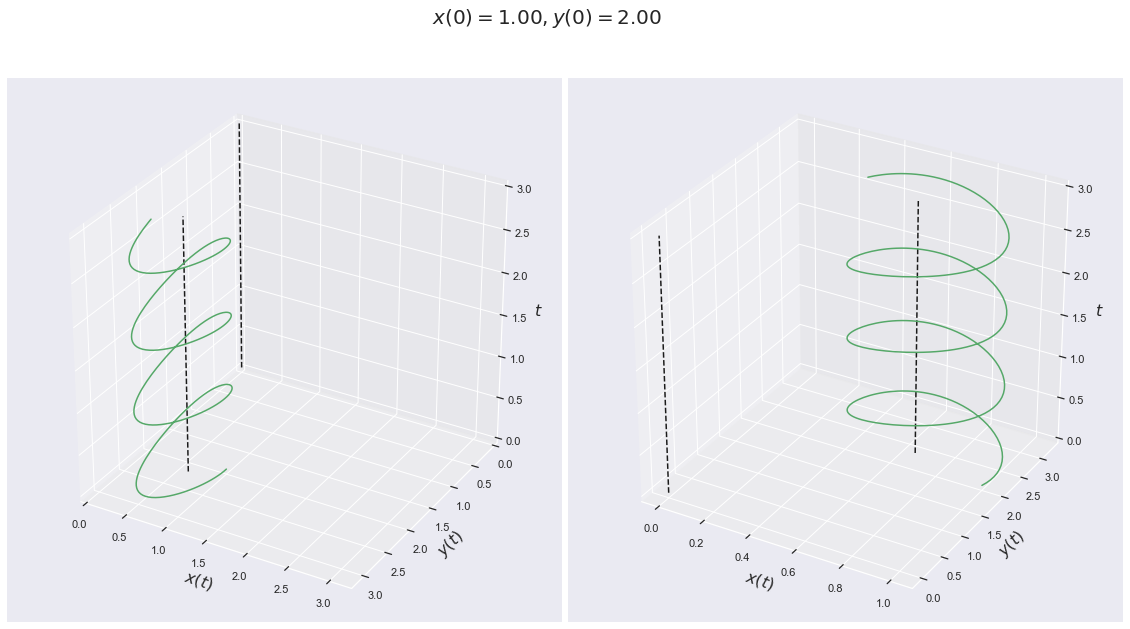

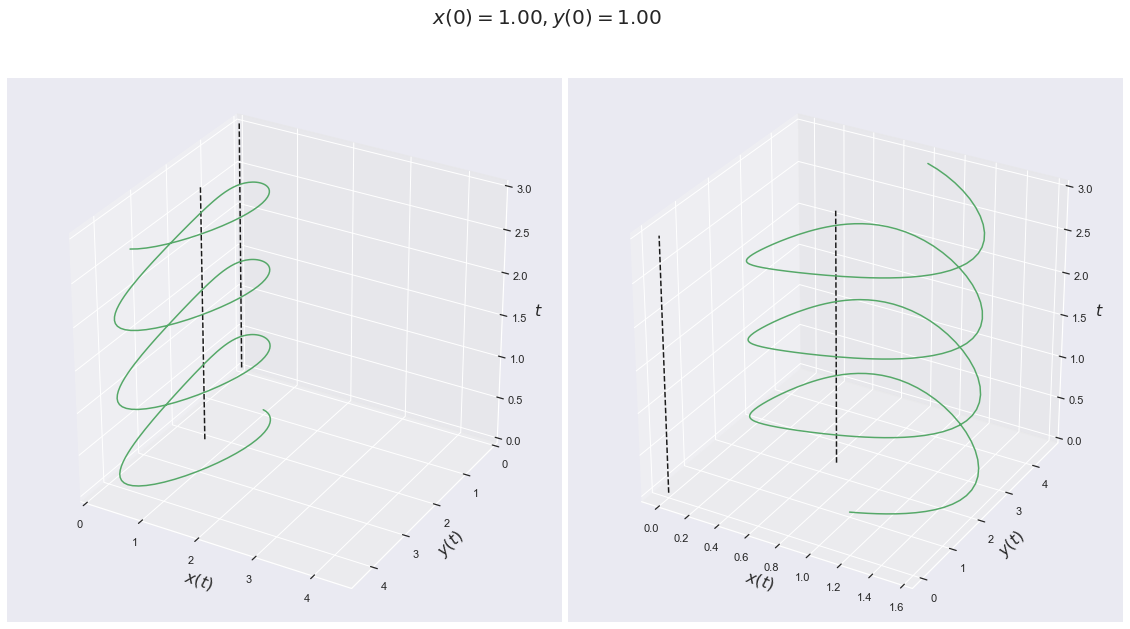

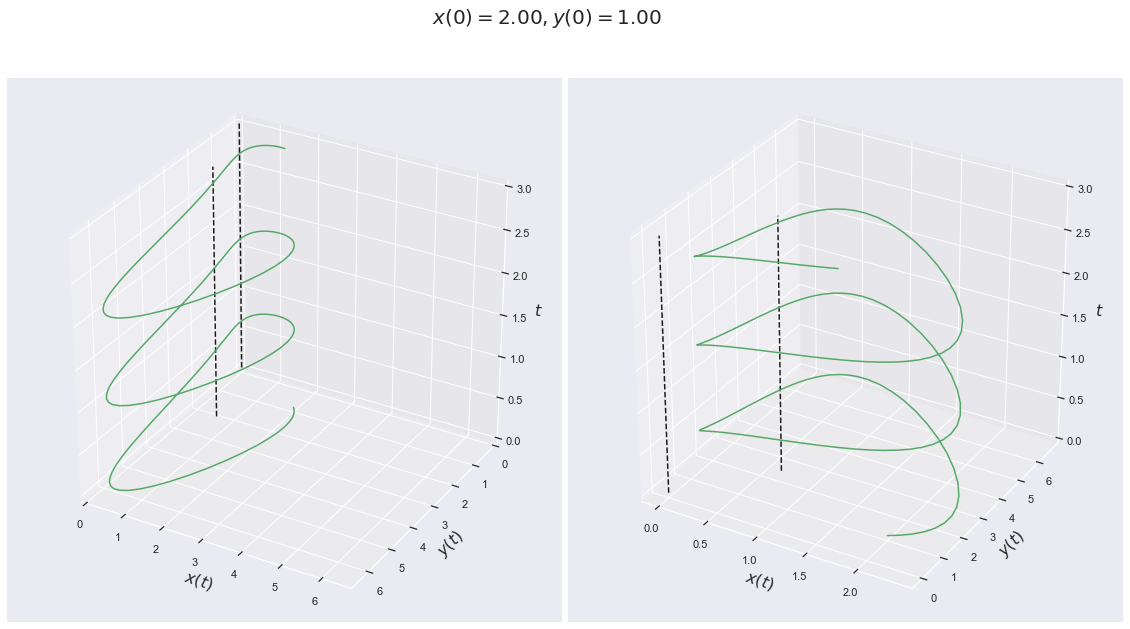

In [7]:
for x, y in initials:
    plot_3d(x, y)